<a href="https://colab.research.google.com/github/wenjunsun/Covid-19-analysis-with-uw-ubicomp/blob/master/analysis/industry_data_and_behavior_correlation_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this notebook we want to discover some correlations between the % of different job types in a county with the ability for people to stay at home. Maybe more technology typed county is able to stay at home more?
job data from https://censusreporter.org/topics/table-codes/

# 0. load industry data

In [ ]:
cd drive/My\ Drive/week3

/content/drive/My Drive/week3


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
# industra_data.csv contains the job composition of a county
industry_data = pd.read_csv('industry_data.csv')

In [ ]:
# schema maps from code of a job to the description of job
schema = pd.read_csv('schema.csv')

# 1. look at industry data

In [ ]:
schema.head()

,GEO_ID,id,Unnamed: 2
0,NAME,Geographic Area Name,NaN
1,S2405_C01_001E,Estimate!!Total!!Civilian employed population ...,NaN
2,S2405_C01_001M,Margin of Error!!Total MOE!!Civilian employed ...,NaN
3,S2405_C01_002E,Estimate!!Total!!Civilian employed population ...,NaN
4,S2405_C01_002M,Margin of Error!!Total MOE!!Civilian employed ...,NaN


In [ ]:
schema[schema['GEO_ID'] == 'S2405_C01_001E']['id']

1    Estimate!!Total!!Civilian employed population ...
Name: id, dtype: object

In [ ]:
for i in range(1, len(schema['id'])):
  print(f"Code {schema.iloc[i, 0]}: {schema.iloc[i, 1]}")

Code S2405_C01_001E: Estimate!!Total!!Civilian employed population 16 years and over
Code S2405_C01_001M: Margin of Error!!Total MOE!!Civilian employed population 16 years and over
Code S2405_C01_002E: Estimate!!Total!!Civilian employed population 16 years and over!!Agriculture, forestry, fishing and hunting, and mining
Code S2405_C01_002M: Margin of Error!!Total MOE!!Civilian employed population 16 years and over!!Agriculture, forestry, fishing and hunting, and mining
Code S2405_C01_003E: Estimate!!Total!!Civilian employed population 16 years and over!!Construction
Code S2405_C01_003M: Margin of Error!!Total MOE!!Civilian employed population 16 years and over!!Construction
Code S2405_C01_004E: Estimate!!Total!!Civilian employed population 16 years and over!!Manufacturing
Code S2405_C01_004M: Margin of Error!!Total MOE!!Civilian employed population 16 years and over!!Manufacturing
Code S2405_C01_005E: Estimate!!Total!!Civilian employed population 16 years and over!!Wholesale trade
Code

We can see that in schema we have the code of the feature mapping to the description (a pretty long description) of the feature. 

In [ ]:
industry_data.head()

,GEO_ID,NAME,S2405_C02_007E,S2405_C02_007M,S2405_C03_007E,S2405_C03_007M,S2405_C04_007E,S2405_C04_007M,S2405_C05_007E,S2405_C05_007M,S2405_C06_007E,S2405_C06_007M,S2405_C01_008E,S2405_C01_008M,S2405_C02_008E,S2405_C02_008M,S2405_C03_008E,S2405_C03_008M,S2405_C04_008E,S2405_C04_008M,S2405_C05_008E,S2405_C05_008M,S2405_C06_008E,S2405_C06_008M,S2405_C01_009E,S2405_C01_009M,S2405_C02_009E,S2405_C02_009M,S2405_C03_009E,S2405_C03_009M,S2405_C04_009E,S2405_C04_009M,S2405_C05_009E,S2405_C05_009M,S2405_C06_009E,S2405_C06_009M,S2405_C01_010E,S2405_C01_010M,S2405_C02_010E,S2405_C02_010M,...,S2405_C06_003E,S2405_C06_003M,S2405_C01_004E,S2405_C01_004M,S2405_C02_004E,S2405_C02_004M,S2405_C03_004E,S2405_C03_004M,S2405_C04_004E,S2405_C04_004M,S2405_C05_004E,S2405_C05_004M,S2405_C06_004E,S2405_C06_004M,S2405_C01_005E,S2405_C01_005M,S2405_C02_005E,S2405_C02_005M,S2405_C03_005E,S2405_C03_005M,S2405_C04_005E,S2405_C04_005M,S2405_C05_005E,S2405_C05_005M,S2405_C06_005E,S2405_C06_005M,S2405_C01_006E,S2405_C01_006M,S2405_C02_006E,S2405_C02_006M,S2405_C03_006E,S2405_C03_006M,S2405_C04_006E,S2405_C04_006M,S2405_C05_006E,S2405_C05_006M,S2405_C06_006E,S2405_C06_006M,S2405_C01_007E,S2405_C01_007M
0,id,Geographic Area Name,"Estimate!!Management, business, science, and a...","Margin of Error!!Management, business, science...",Estimate!!Service occupations!!Civilian employ...,Margin of Error!!Service occupations MOE!!Civi...,Estimate!!Sales and office occupations!!Civili...,Margin of Error!!Sales and office occupations ...,"Estimate!!Natural resources, construction, and...","Margin of Error!!Natural resources, constructi...","Estimate!!Production, transportation, and mate...","Margin of Error!!Production, transportation, a...",Estimate!!Total!!Civilian employed population ...,Margin of Error!!Total MOE!!Civilian employed ...,"Estimate!!Management, business, science, and a...","Margin of Error!!Management, business, science...",Estimate!!Service occupations!!Civilian employ...,Margin of Error!!Service occupations MOE!!Civi...,Estimate!!Sales and office occupations!!Civili...,Margin of Error!!Sales and office occupations ...,"Estimate!!Natural resources, construction, and...","Margin of Error!!Natural resources, constructi...","Estimate!!Production, transportation, and mate...","Margin of Error!!Production, transportation, a...",Estimate!!Total!!Civilian employed population ...,Margin of Error!!Total MOE!!Civilian employed ...,"Estimate!!Management, business, science, and a...","Margin of Error!!Management, business, science...",Estimate!!Service occupations!!Civilian employ...,Margin of Error!!Service occupations MOE!!Civi...,Estimate!!Sales and office occupations!!Civili...,Margin of Error!!Sales and office occupations ...,"Estimate!!Natural resources, construction, and...","Margin of Error!!Natural resources, constructi...","Estimate!!Production, transportation, and mate...","Margin of Error!!Production, transportation, a...",Estimate!!Total!!Civilian employed population ...,Margin of Error!!Total MOE!!Civilian employed ...,"Estimate!!Management, business, science, and a...","Margin of Error!!Management, business, science...",...,"Estimate!!Production, transportation, and mate...","Margin of Error!!Production, transportation, a...",Estimate!!Total!!Civilian employed population ...,Margin of Error!!Total MOE!!Civilian employed ...,"Estimate!!Management, business, science, and a...","Margin of Error!!Management, business, science...",Estimate!!Service occupations!!Civilian employ...,Margin of Error!!Service occupations MOE!!Civi...,Estimate!!Sales and office occupations!!Civili...,Margin of Error!!Sales and office occupations ...,"Estimate!!Natural resources, construction, and...","Margin of Error!!Natural resources, constructi...","Estimate!!Production, transportation, and mate...","Margin of Error!!Production, transportation, a...",Estimate!!Total!!Civilian employed population ...,Margin of Error!!Total MOE!!Civilian employed ...,"Estimate!!Management, busi

we can see the first row of our industry data is actually the description of jobs. We need to delete this row for future analysis, based purely on the codes

In [ ]:
industry_data.drop(index = 0, inplace=True)

In [ ]:
industry_data.head()

,GEO_ID,NAME,S2405_C02_007E,S2405_C02_007M,S2405_C03_007E,S2405_C03_007M,S2405_C04_007E,S2405_C04_007M,S2405_C05_007E,S2405_C05_007M,S2405_C06_007E,S2405_C06_007M,S2405_C01_008E,S2405_C01_008M,S2405_C02_008E,S2405_C02_008M,S2405_C03_008E,S2405_C03_008M,S2405_C04_008E,S2405_C04_008M,S2405_C05_008E,S2405_C05_008M,S2405_C06_008E,S2405_C06_008M,S2405_C01_009E,S2405_C01_009M,S2405_C02_009E,S2405_C02_009M,S2405_C03_009E,S2405_C03_009M,S2405_C04_009E,S2405_C04_009M,S2405_C05_009E,S2405_C05_009M,S2405_C06_009E,S2405_C06_009M,S2405_C01_010E,S2405_C01_010M,S2405_C02_010E,S2405_C02_010M,...,S2405_C06_003E,S2405_C06_003M,S2405_C01_004E,S2405_C01_004M,S2405_C02_004E,S2405_C02_004M,S2405_C03_004E,S2405_C03_004M,S2405_C04_004E,S2405_C04_004M,S2405_C05_004E,S2405_C05_004M,S2405_C06_004E,S2405_C06_004M,S2405_C01_005E,S2405_C01_005M,S2405_C02_005E,S2405_C02_005M,S2405_C03_005E,S2405_C03_005M,S2405_C04_005E,S2405_C04_005M,S2405_C05_005E,S2405_C05_005M,S2405_C06_005E,S2405_C06_005M,S2405_C01_006E,S2405_C01_006M,S2405_C02_006E,S2405_C02_006M,S2405_C03_006E,S2405_C03_006M,S2405_C04_006E,S2405_C04_006M,S2405_C05_006E,S2405_C05_006M,S2405_C06_006E,S2405_C06_006M,S2405_C01_007E,S2405_C01_007M
1,0500000US01001,"Autauga County, Alabama",16.7,7.1,0.4,0.6,21.6,7.6,4.6,2.6,56.7,10.6,393,169,47.3,19.7,18.8,14.8,19.3,12.3,14.5,11.2,0.0,7.9,1510,303,44.4,11.4,1.5,2.3,50.7,11.1,2.9,3.9,0.4,0.9,2158,289,46.8,8.8,...,2.6,2.3,3123,471,24.8,6.7,2.2,1.7,9.3,4.0,9.0,5.3,54.7,7.1,656,211,12.0,9.1,0.0,4.8,57.6,15.4,5.3,6.4,25.0,17.3,2154,279,6.4,3.2,0.4,0.6,71.0,6.6,6.9,4.4,15.3,5.9,1685,342
2,0500000US01003,"Baldwin County, Alabama",19.0,4.3,3.0,2.3,16.5,5.1,10.8,3.7,50.7,7.0,1279,254,59.4,8.7,2.9,3.2,21.4,8.1,14.3,6.1,2.0,2.0,6909,710,38.4,4.8,9.8,3.7,48.3,5.7,3.1,1.8,0.4,0.4,9940,936,48.2,5.1,...,4.3,2.0,8516,912,30.4,4.6,0.8,0.8,11.7,2.8,9.9,2.8,47.2,5.7,2887,491,18.0,7.4,1.6,1.7,56.5,9.2,8.0,8.5,15.9,5.9,12801,1046,7.7,1.9,4.9,1.7,66.9,3.9,4.0,1.1,16.4,3.6,4599,490
3,0500000US01005,"Barbour County, Alabama",15.8,9.7,1.3,2.0,21.4,8.2,13.8,7.9,47.8,11.6,21,24,0.0,64.7,0.0,64.7,19.0,37.8,81.0,37.8,0.0,64.7,346,98,50.9,16.8,1.7,3.9,46.2,16.6,0.0,9.0,1.2,1.7,416,107,42.5,13.4,...,4.4,5.0,2083,259,12.9,4.6,4.3,2.9,9.2,3.5,11.7,4.2,61.9,6.4,243,99,1.6,2.7,6.6,10.3,60.1,20.7,0.0,12.5,31.7,18.0,926,171,7.2,4.9,3.0,2.6,51.4,9.3,2.6,2.3,35.7,9.4,603,135
4,0500000US01007,"Bibb County, Alabama",2.5,2.7,8.8,13.9,43.9,26.4,6.3,11.1,38.4,19.5,106,82,8.5,16.1,0.0,25.9,91.5,16.1,0.0,25.9,0.0,25.9,371,150,14.6,11.2,3.8,7.0,69.0,15.3,8.4,9.1,4.3,7.3,380,143,20.8,11.6,...,6.7,6.0,1515,322,13.5,7.2,1.7,1.7,3.6,3.6,9.3,6.0,71.9,10.0,139,98,4.3,9.4,2.2,5.6,50.4,34.8,18.0,23.3,25.2,25.9,741,250,2.2,2.2,7.2,5.3,65.0,13.2,6.5,7.8,19.2,9.2,396,195
5,0500000US01009,"Blount County, Alabama",15.8,7.4,3.6,3.6,26.0,9.4,10.9,6.2,43.8,7.7,267,126,47.9,23.5,5.2,8.2,18.4,17.8,19.5,17.0,9.0,12.0,1246,278,55.2,11.0,1.0,1.1,38.7,10.5,1.8,2.6,3.4,4.2,1639,331,41.8,8.2,...,5.5,3.7,3503,437,10.8,3.4,1.6,1.2,9.8,3.7,12.9,3.4,64.9,5.4,768,187,14.5,7.1,4.6,4.9,53.3,13.2,12.9,7.5,14.8,8.9,2510,373,12.4,5.7,4.4,3.7,53.5,7.8,8.0,4.2,21.7,6.6,1465,236


In [ ]:
industry_data.shape

(3220, 182)

Data is 3220 x 182 \\
So I guess the data has every county's job distribution data.

The columns we are interested in right now: \\
S2405_C01_001E: total employment \\
S2405_C01_001M \\
S2405_C01_002E \\
S2405_C01_002M \\
S2405_C01_003E \\
S2405_C01_003M \\
S2405_C01_004E \\
S2405_C01_004M \\
S2405_C01_005E \\
S2405_C01_005M \\
S2405_C01_006E \\
S2405_C01_006M \\
S2405_C01_007E \\
S2405_C01_007M \\
S2405_C01_008E \\
S2405_C01_008M \\
S2405_C01_009E \\
S2405_C01_009M \\
S2405_C01_010E \\
S2405_C01_010M \\
S2405_C01_011E \\
S2405_C01_011M \\
S2405_C01_012E \\
S2405_C01_012M \\
S2405_C01_013E \\
S2405_C01_013M \\
S2405_C01_014E \\
S2405_C01_014M \\

In [ ]:
industry_data = industry_data[['NAME', 'S2405_C01_001E','S2405_C01_001M','S2405_C01_002E',\
             'S2405_C01_002M','S2405_C01_003E','S2405_C01_003M',\
             'S2405_C01_004E','S2405_C01_004M','S2405_C01_005E',\
             'S2405_C01_005M','S2405_C01_006E','S2405_C01_006M',\
             'S2405_C01_007E','S2405_C01_007M','S2405_C01_008E',\
             'S2405_C01_008M','S2405_C01_009E','S2405_C01_009M',\
             'S2405_C01_010E','S2405_C01_010M','S2405_C01_011E',\
             'S2405_C01_011M','S2405_C01_012E','S2405_C01_012M',\
             'S2405_C01_013E','S2405_C01_013M','S2405_C01_014E',\
             'S2405_C01_014M']]

In [ ]:
industry_data.head()

,NAME,S2405_C01_001E,S2405_C01_001M,S2405_C01_002E,S2405_C01_002M,S2405_C01_003E,S2405_C01_003M,S2405_C01_004E,S2405_C01_004M,S2405_C01_005E,S2405_C01_005M,S2405_C01_006E,S2405_C01_006M,S2405_C01_007E,S2405_C01_007M,S2405_C01_008E,S2405_C01_008M,S2405_C01_009E,S2405_C01_009M,S2405_C01_010E,S2405_C01_010M,S2405_C01_011E,S2405_C01_011M,S2405_C01_012E,S2405_C01_012M,S2405_C01_013E,S2405_C01_013M,S2405_C01_014E,S2405_C01_014M
1,"Autauga County, Alabama",24124,737,213,127,1448,328,3123,471,656,211,2154,279,1685,342,393,169,1510,303,2158,289,4844,529,1960,387,1507,309,2473,406
2,"Baldwin County, Alabama",93379,1624,1240,305,7722,888,8516,912,2887,491,12801,1046,4599,490,1279,254,6909,710,9940,936,18758,1257,9416,866,4581,647,4731,604
3,"Barbour County, Alabama",8720,417,394,152,545,139,2083,259,243,99,926,171,603,135,21,24,346,98,416,107,1626,213,516,118,382,127,619,139
4,"Bibb County, Alabama",8099,488,485,170,730,263,1515,322,139,98,741,250,396,195,106,82,371,150,380,143,1847,301,356,181,606,214,427,175
5,"Blount County, Alabama",21346,709,487,152,2020,290,3503,437,768,187,2510,373,1465,236,267,126,1246,278,1639,331,4204,397,987,221,1271,238,979,203


Since every column is the number of people employed in a certain sector of jobs within a county, we want to devide them by the total employment to get a percentage 

In [ ]:
industry_data.dtypes

NAME              object
S2405_C01_001E    object
S2405_C01_001M    object
S2405_C01_002E    object
S2405_C01_002M    object
S2405_C01_003E    object
S2405_C01_003M    object
S2405_C01_004E    object
S2405_C01_004M    object
S2405_C01_005E    object
S2405_C01_005M    object
S2405_C01_006E    object
S2405_C01_006M    object
S2405_C01_007E    object
S2405_C01_007M    object
S2405_C01_008E    object
S2405_C01_008M    object
S2405_C01_009E    object
S2405_C01_009M    object
S2405_C01_010E    object
S2405_C01_010M    object
S2405_C01_011E    object
S2405_C01_011M    object
S2405_C01_012E    object
S2405_C01_012M    object
S2405_C01_013E    object
S2405_C01_013M    object
S2405_C01_014E    object
S2405_C01_014M    object
dtype: object

In [ ]:
type(industry_data.iloc[0,1])

str

It turns out all the data, although looks like an int, is actually strings! Need to convert them to int first. Before that, let's check if anything is null

In [ ]:
industry_data.isnull().sum()

NAME              0
S2405_C01_001E    1
S2405_C01_001M    1
S2405_C01_002E    1
S2405_C01_002M    1
S2405_C01_003E    1
S2405_C01_003M    1
S2405_C01_004E    1
S2405_C01_004M    1
S2405_C01_005E    1
S2405_C01_005M    1
S2405_C01_006E    1
S2405_C01_006M    1
S2405_C01_007E    1
S2405_C01_007M    1
S2405_C01_008E    1
S2405_C01_008M    1
S2405_C01_009E    1
S2405_C01_009M    1
S2405_C01_010E    1
S2405_C01_010M    1
S2405_C01_011E    1
S2405_C01_011M    1
S2405_C01_012E    1
S2405_C01_012M    1
S2405_C01_013E    1
S2405_C01_013M    1
S2405_C01_014E    1
S2405_C01_014E    1
dtype: int64

We have one null data! before we convert string to int, let's first check this null row

In [ ]:
industry_data[industry_data['S2405_C01_001E'].isnull()]

,NAME,S2405_C01_001E,S2405_C01_001M,S2405_C01_002E,S2405_C01_002M,S2405_C01_003E,S2405_C01_003M,S2405_C01_004E,S2405_C01_004M,S2405_C01_005E,S2405_C01_005M,S2405_C01_006E,S2405_C01_006M,S2405_C01_007E,S2405_C01_007M,S2405_C01_008E,S2405_C01_008M,S2405_C01_009E,S2405_C01_009M,S2405_C01_010E,S2405_C01_010M,S2405_C01_011E,S2405_C01_011M,S2405_C01_012E,S2405_C01_012M,S2405_C01_013E,S2405_C01_013M,S2405_C01_014E,S2405_C01_014M
1817,"Rio Arriba County, New Mexico",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


we don't have any data on this county: Rio Arriba County, New Mexico. Let's just delete this row

In [ ]:
industry_data.drop(index = 1817, inplace=True)

In [ ]:
industry_data.isnull().sum()

NAME              0
S2405_C01_001E    0
S2405_C01_001M    0
S2405_C01_002E    0
S2405_C01_002M    0
S2405_C01_003E    0
S2405_C01_003M    0
S2405_C01_004E    0
S2405_C01_004M    0
S2405_C01_005E    0
S2405_C01_005M    0
S2405_C01_006E    0
S2405_C01_006M    0
S2405_C01_007E    0
S2405_C01_007M    0
S2405_C01_008E    0
S2405_C01_008M    0
S2405_C01_009E    0
S2405_C01_009M    0
S2405_C01_010E    0
S2405_C01_010M    0
S2405_C01_011E    0
S2405_C01_011M    0
S2405_C01_012E    0
S2405_C01_012M    0
S2405_C01_013E    0
S2405_C01_013M    0
S2405_C01_014E    0
S2405_C01_014M    0
dtype: int64

Now that we have all nice non-null data, let's convert data types from string into int

In [ ]:
for col in list(industry_data.columns)[1:]:
  industry_data[col] = industry_data[col].astype(int)

In [ ]:
industry_data.dtypes

NAME              object
S2405_C01_001E     int64
S2405_C01_001M     int64
S2405_C01_002E     int64
S2405_C01_002M     int64
S2405_C01_003E     int64
S2405_C01_003M     int64
S2405_C01_004E     int64
S2405_C01_004M     int64
S2405_C01_005E     int64
S2405_C01_005M     int64
S2405_C01_006E     int64
S2405_C01_006M     int64
S2405_C01_007E     int64
S2405_C01_007M     int64
S2405_C01_008E     int64
S2405_C01_008M     int64
S2405_C01_009E     int64
S2405_C01_009M     int64
S2405_C01_010E     int64
S2405_C01_010M     int64
S2405_C01_011E     int64
S2405_C01_011M     int64
S2405_C01_012E     int64
S2405_C01_012M     int64
S2405_C01_013E     int64
S2405_C01_013M     int64
S2405_C01_014E     int64
S2405_C01_014M     int64
dtype: object

In [ ]:
# calculate percentage
for sector in list(industry_data.columns)[2:]:
  industry_data[sector] = industry_data[sector] / industry_data['S2405_C01_001E']

In [ ]:
industry_data.head()

,NAME,S2405_C01_001E,S2405_C01_001M,S2405_C01_002E,S2405_C01_002M,S2405_C01_003E,S2405_C01_003M,S2405_C01_004E,S2405_C01_004M,S2405_C01_005E,S2405_C01_005M,S2405_C01_006E,S2405_C01_006M,S2405_C01_007E,S2405_C01_007M,S2405_C01_008E,S2405_C01_008M,S2405_C01_009E,S2405_C01_009M,S2405_C01_010E,S2405_C01_010M,S2405_C01_011E,S2405_C01_011M,S2405_C01_012E,S2405_C01_012M,S2405_C01_013E,S2405_C01_013M,S2405_C01_014E,S2405_C01_014M
1,"Autauga County, Alabama",24124,0.030550,0.008829,0.005264,0.060023,0.013596,0.129456,0.019524,0.027193,0.008746,0.089289,0.011565,0.069847,0.014177,0.016291,0.007005,0.062593,0.012560,0.089454,0.011980,0.200796,0.021928,0.081247,0.016042,0.062469,0.012809,0.102512,0.016830
2,"Baldwin County, Alabama",93379,0.017391,0.013279,0.003266,0.082695,0.009510,0.091198,0.009767,0.030917,0.005258,0.137086,0.011202,0.049251,0.005247,0.013697,0.002720,0.073989,0.007603,0.106448,0.010024,0.200880,0.013461,0.100836,0.009274,0.049058,0.006929,0.050664,0.006468
3,"Barbour County, Alabama",8720,0.047821,0.045183,0.017431,0.062500,0.015940,0.238876,0.029702,0.027867,0.011353,0.106193,0.019610,0.069151,0.015482,0.002408,0.002752,0.039679,0.011239,0.047706,0.012271,0.186468,0.024427,0.059174,0.013532,0.043807,0.014564,0.070986,0.015940
4,"Bibb County, Alabama",8099,0.060254,0.059884,0.020990,0.090135,0.032473,0.187060,0.039758,0.017163,0.012100,0.091493,0.030868,0.048895,0.024077,0.013088,0.010125,0.045808,0.018521,0.046919,0.017657,0.228053,0.037165,0.043956,0.022348,0.074824,0.026423,0.052723,0.021608
5,"Blount County, Alabama",21346,0.033215,0.022815,0.007121,0.094631,0.013586,0.164106,0.020472,0.035979,0.008760,0.117586,0.017474,0.068631,0.011056,0.012508,0.005903,0.058372,0.013024,0.076783,0.015506,0.196946,0.018598,0.046238,0.010353,0.059543,0.011150,0.045863,0.009510


In [ ]:
# let's save this intermediate industry dataset for future use
industry_data.to_csv("industry_data_clean.csv", index = False)

# 2. combine industry data with social distancing data to investigate correlation.

In [ ]:
industry_data = pd.read_csv("industry_data_clean.csv")

In [ ]:
industry_data.head()

,NAME,S2405_C01_001E,S2405_C01_001M,S2405_C01_002E,S2405_C01_002M,S2405_C01_003E,S2405_C01_003M,S2405_C01_004E,S2405_C01_004M,S2405_C01_005E,S2405_C01_005M,S2405_C01_006E,S2405_C01_006M,S2405_C01_007E,S2405_C01_007M,S2405_C01_008E,S2405_C01_008M,S2405_C01_009E,S2405_C01_009M,S2405_C01_010E,S2405_C01_010M,S2405_C01_011E,S2405_C01_011M,S2405_C01_012E,S2405_C01_012M,S2405_C01_013E,S2405_C01_013M,S2405_C01_014E,S2405_C01_014M
0,"Autauga County, Alabama",24124,0.030550,0.008829,0.005264,0.060023,0.013596,0.129456,0.019524,0.027193,0.008746,0.089289,0.011565,0.069847,0.014177,0.016291,0.007005,0.062593,0.012560,0.089454,0.011980,0.200796,0.021928,0.081247,0.016042,0.062469,0.012809,0.102512,0.016830
1,"Baldwin County, Alabama",93379,0.017391,0.013279,0.003266,0.082695,0.009510,0.091198,0.009767,0.030917,0.005258,0.137086,0.011202,0.049251,0.005247,0.013697,0.002720,0.073989,0.007603,0.106448,0.010024,0.200880,0.013461,0.100836,0.009274,0.049058,0.006929,0.050664,0.006468
2,"Barbour County, Alabama",8720,0.047821,0.045183,0.017431,0.062500,0.015940,0.238876,0.029702,0.027867,0.011353,0.106193,0.019610,0.069151,0.015482,0.002408,0.002752,0.039679,0.011239,0.047706,0.012271,0.186468,0.024427,0.059174,0.013532,0.043807,0.014564,0.070986,0.015940
3,"Bibb County, Alabama",8099,0.060254,0.059884,0.020990,0.090135,0.032473,0.187060,0.039758,0.017163,0.012100,0.091493,0.030868,0.048895,0.024077,0.013088,0.010125,0.045808,0.018521,0.046919,0.017657,0.228053,0.037165,0.043956,0.022348,0.074824,0.026423,0.052723,0.021608
4,"Blount County, Alabama",21346,0.033215,0.022815,0.007121,0.094631,0.013586,0.164106,0.020472,0.035979,0.008760,0.117586,0.017474,0.068631,0.011056,0.012508,0.005903,0.058372,0.013024,0.076783,0.015506,0.196946,0.018598,0.046238,0.010353,0.059543,0.011150,0.045863,0.009510


In [ ]:
county_data = pd.read_csv("county_data.csv")

In [ ]:
county_data.head()

,cnamelong,county_code,state,state_code,percent_completely_home_device_after_covid,device_count_after_covid,percent_completely_home_device_before,device_count_before,percent_completely_home_device_after_sip,device_count_after_sip
0,Abbeville County,45001,45.0,SC,0.290856,1595.966667,0.251283,1643.500000,0.289275,1622.033333
1,Acadia Parish,22001,22.0,LA,0.277490,4169.500000,0.196973,4547.500000,0.277490,4169.500000
2,Accomack County,51001,51.0,VA,0.329359,1578.500000,0.251292,1637.800000,0.337730,1608.633333
3,Ada County,16001,16.0,ID,0.385269,21199.400000,0.254269,22976.133333,0.406879,20765.800000
4,Adair County,21001,21.0,KY,0.295031,723.615385,0.234935,579.314815,0.299196,656.790698


We can see that industry_data's county names include state name, while county_data's cnamelong doesn't include state name.

In [ ]:
industry_data[industry_data['NAME'] == 'Abbeville County, South Carolina']

,NAME,S2405_C01_001E,S2405_C01_001M,S2405_C01_002E,S2405_C01_002M,S2405_C01_003E,S2405_C01_003M,S2405_C01_004E,S2405_C01_004M,S2405_C01_005E,S2405_C01_005M,S2405_C01_006E,S2405_C01_006M,S2405_C01_007E,S2405_C01_007M,S2405_C01_008E,S2405_C01_008M,S2405_C01_009E,S2405_C01_009M,S2405_C01_010E,S2405_C01_010M,S2405_C01_011E,S2405_C01_011M,S2405_C01_012E,S2405_C01_012M,S2405_C01_013E,S2405_C01_013M,S2405_C01_014E,S2405_C01_014M
2315,"Abbeville County, South Carolina",9748,0.048625,0.016619,0.008104,0.080427,0.020312,0.238921,0.03334,0.01785,0.010361,0.083094,0.021851,0.037341,0.011695,0.01867,0.009848,0.029237,0.009746,0.086069,0.02657,0.243127,0.026775,0.064731,0.020312,0.049856,0.013541,0.034058,0.014259


In [ ]:
state_name_to_code = pd.read_csv('state_name_to_code.csv')

In [ ]:
state_name_to_code.head()

,State,Abbrev,Code
0,Alabama,Ala.,AL
1,Alaska,Alaska,AK
2,Arizona,Ariz.,AZ
3,Arkansas,Ark.,AR
4,California,Calif.,CA


In [ ]:
state_name_to_code = state_name_to_code.append(pd.DataFrame([['Puerto Rico', '','PR']], columns=['State','Abbrev','Code']), ignore_index=True)

In [ ]:
state_name_to_code

,State,Abbrev,Code
0,Alabama,Ala.,AL
1,Alaska,Alaska,AK
2,Arizona,Ariz.,AZ
3,Arkansas,Ark.,AR
4,California,Calif.,CA
5,Colorado,Colo.,CO
6,Connecticut,Conn.,CT
7,Delaware,Del.,DE
8,District of Columbia,D.C.,DC
9,Florida,Fla.,FL


In [ ]:
 county_data['NAME'] = county_data.apply(lambda row: f"{row['cnamelong']}, {state_name_to_code[state_name_to_code['Code'] == row['state_code']]['State'].values[0]}", axis = 1)

In [ ]:
county_data.head()

,cnamelong,county_code,state,state_code,percent_completely_home_device_after_covid,device_count_after_covid,percent_completely_home_device_before,device_count_before,percent_completely_home_device_after_sip,device_count_after_sip,NAME
0,Abbeville County,45001,45.0,SC,0.290856,1595.966667,0.251283,1643.500000,0.289275,1622.033333,"Abbeville County, South Carolina"
1,Acadia Parish,22001,22.0,LA,0.277490,4169.500000,0.196973,4547.500000,0.277490,4169.500000,"Acadia Parish, Louisiana"
2,Accomack County,51001,51.0,VA,0.329359,1578.500000,0.251292,1637.800000,0.337730,1608.633333,"Accomack County, Virginia"
3,Ada County,16001,16.0,ID,0.385269,21199.400000,0.254269,22976.133333,0.406879,20765.800000,"Ada County, Idaho"
4,Adair County,21001,21.0,KY,0.295031,723.615385,0.234935,579.314815,0.299196,656.790698,"Adair County, Kentucky"


In [ ]:
data = county_data.merge(industry_data, on="NAME").reset_index()

In [ ]:
data.head()

,index,cnamelong,county_code,state,state_code,percent_completely_home_device_after_covid,device_count_after_covid,percent_completely_home_device_before,device_count_before,percent_completely_home_device_after_sip,device_count_after_sip,NAME,S2405_C01_001E,S2405_C01_001M,S2405_C01_002E,S2405_C01_002M,S2405_C01_003E,S2405_C01_003M,S2405_C01_004E,S2405_C01_004M,S2405_C01_005E,S2405_C01_005M,S2405_C01_006E,S2405_C01_006M,S2405_C01_007E,S2405_C01_007M,S2405_C01_008E,S2405_C01_008M,S2405_C01_009E,S2405_C01_009M,S2405_C01_010E,S2405_C01_010M,S2405_C01_011E,S2405_C01_011M,S2405_C01_012E,S2405_C01_012M,S2405_C01_013E,S2405_C01_013M,S2405_C01_014E,S2405_C01_014M
0,0,Abbeville County,45001,45.0,SC,0.290856,1595.966667,0.251283,1643.500000,0.289275,1622.033333,"Abbeville County, South Carolina",9748,0.048625,0.016619,0.008104,0.080427,0.020312,0.238921,0.033340,0.017850,0.010361,0.083094,0.021851,0.037341,0.011695,0.018670,0.009848,0.029237,0.009746,0.086069,0.026570,0.243127,0.026775,0.064731,0.020312,0.049856,0.013541,0.034058,0.014259
1,1,Acadia Parish,22001,22.0,LA,0.277490,4169.500000,0.196973,4547.500000,0.277490,4169.500000,"Acadia Parish, Louisiana",25356,0.030762,0.122496,0.016170,0.077063,0.011713,0.098714,0.018181,0.032971,0.011319,0.140282,0.021218,0.053242,0.010648,0.016170,0.007927,0.030604,0.008164,0.058566,0.013409,0.212060,0.018221,0.066651,0.014395,0.053912,0.011989,0.037269,0.010057
2,2,Accomack County,51001,51.0,VA,0.329359,1578.500000,0.251292,1637.800000,0.337730,1608.633333,"Accomack County, Virginia",13817,0.048708,0.056814,0.017008,0.083376,0.017298,0.177101,0.028371,0.029674,0.009336,0.101252,0.019469,0.034957,0.008323,0.004777,0.003981,0.025476,0.010132,0.078888,0.019758,0.203662,0.033220,0.079105,0.020699,0.036404,0.013027,0.088514,0.018962
3,3,Ada County,16001,16.0,ID,0.385269,21199.400000,0.254269,22976.133333,0.406879,20765.800000,"Ada County, Idaho",221254,0.011471,0.014513,0.002807,0.060849,0.004655,0.087641,0.005821,0.028298,0.003525,0.117892,0.006942,0.043213,0.004362,0.021292,0.003245,0.070928,0.004628,0.129308,0.006612,0.230717,0.007982,0.091334,0.006391,0.043326,0.003864,0.060690,0.004330
4,4,Adair County,21001,21.0,KY,0.295031,723.615385,0.234935,579.314815,0.299196,656.790698,"Adair County, Kentucky",8020,0.043267,0.032045,0.011596,0.095137,0.024813,0.189401,0.030549,0.011970,0.006608,0.106858,0.025187,0.059102,0.018953,0.011970,0.006484,0.029800,0.011970,0.041895,0.013965,0.270698,0.031671,0.071696,0.024065,0.040399,0.016085,0.039027,0.014090


In [ ]:
data.to_csv("merged_industry_and_dist_data.csv", index = False)

In [ ]:
corrMatrix = data.corr()

In [ ]:
corrMatrix

,index,county_code,state,percent_completely_home_device_after_covid,device_count_after_covid,percent_completely_home_device_before,device_count_before,percent_completely_home_device_after_sip,device_count_after_sip,S2405_C01_001E,S2405_C01_001M,S2405_C01_002E,S2405_C01_002M,S2405_C01_003E,S2405_C01_003M,S2405_C01_004E,S2405_C01_004M,S2405_C01_005E,S2405_C01_005M,S2405_C01_006E,S2405_C01_006M,S2405_C01_007E,S2405_C01_007M,S2405_C01_008E,S2405_C01_008M,S2405_C01_009E,S2405_C01_009M,S2405_C01_010E,S2405_C01_010M,S2405_C01_011E,S2405_C01_011M,S2405_C01_012E,S2405_C01_012M,S2405_C01_013E,S2405_C01_013M,S2405_C01_014E,S2405_C01_014M
index,1.000000,0.000363,-0.003001,-0.008042,0.012534,-0.031517,0.012499,0.007432,0.010817,0.009953,-0.018259,0.026406,-0.005278,-0.017900,-0.020988,0.004594,-0.021723,0.039273,-0.006208,-0.041133,-0.030807,-0.021959,-0.020995,-0.004864,-0.021710,-0.000591,-0.015201,-0.005287,0.003096,0.007129,-0.012180,0.000795,-0.018235,-0.010524,-0.025443,-0.015388,-0.010147
county_code,0.000363,1.000000,0.999977,0.318211,-0.070270,0.283108,-0.069238,0.257653,-0.069060,-0.071578,0.029432,-0.008364,-0.002098,-0.021055,0.014096,-0.021210,-0.000545,-0.049833,0.001187,0.080022,0.047450,-0.109599,-0.009403,-0.068363,0.012376,-0.038309,0.031779,0.019488,0.055557,0.075903,0.063181,-0.024282,0.032767,0.022422,0.053938,0.031685,0.056164
state,-0.003001,0.999977,1.000000,0.319358,-0.070046,0.283754,-0.068995,0.258972,-0.068840,-0.071255,0.028764,-0.008768,-0.002624,-0.021163,0.013334,-0.021027,-0.001366,-0.049903,0.000423,0.080192,0.046610,-0.109974,-0.010246,-0.068130,0.011843,-0.038039,0.031028,0.019549,0.054645,0.076144,0.062351,-0.023991,0.032071,0.021703,0.052921,0.031510,0.055494
percent_completely_home_device_after_covid,-0.008042,0.318211,0.319358,1.000000,0.072529,0.680676,0.081167,0.915794,0.077113,0.057323,-0.195150,-0.245900,-0.272815,-0.141033,-0.258676,-0.122308,-0.290292,0.017247,-0.213996,0.084251,-0.216190,-0.234849,-0.291436,0.208369,-0.110887,0.226771,-0.195285,0.338824,-0.146081,0.017641,-0.234602,0.177744,-0.151707,0.035789,-0.206821,0.106768,-0.135704
device_count_after_covid,0.012534,-0.070270,-0.070046,0.072529,1.000000,0.213739,0.996902,0.303758,0.994546,0.962637,-0.323225,-0.224340,-0.271248,-0.113678,-0.358493,-0.123809,-0.371826,0.116502,-0.317056,0.001941,-0.379041,-0.033289,-0.338422,0.291547,-0.272060,0.388259,-0.354060,0.420832,-0.349493,-0.031213,-0.384623,0.121544,-0.341305,0.055537,-0.363908,-0.129110,-0.311201
percent_completely_home_device_before,-0.031517,0.283108,0.283754,0.680676,0.213739,1.000000,0.210891,0.684937,0.220690,0.185517,-0.160721,-0.213827,-0.214924,-0.057250,-0.195129,-0.210750,-0.274447,-0.056687,-0.225198,0.101503,-0.184117,-0.154709,-0.246909,0.219407,-0.096008,0.216021,-0.186208,0.405922,-0.110646,-0.062085,-0.207943,0.194822,-0.136171,0.084541,-0.178039,0.163047,-0.093611
device_count_before,0.012499,-0.069238,-0.068995,0.081167,0.996902,0.210891,1.000000,0.315410,0.992376,0.961494,-0.332282,-0.230572,-0.279264,-0.121703,-0.368990,-0.126031,-0.382063,0.118637,-0.325582,0.000604,-0.389332,-0.040315,-0.348314,0.299637,-0.278909,0.399011,-0.363349,0.431306,-0.358651,-0.025583,-0.394923,0.123163,-0.350080,0.054264,-0.373913,-0.131825,-0.319602
percent_completely_home_device_after_sip,0.007432,0.257653,0.258972,0.915794,0.303758,0.684937,0.315410,1.000000,0.307173,0.305578,-0.289360,-0.279615,-0.324254,-0.181199,-0.353957,-0.188627,-0.408407,0.044769,-0.304498,0.034649,-0.329946,-0.264258,-0.383431,0.323789,-0.190126,0.352055,-0.292486,0.486556,-0.248184,0.027921,-0.338382,0.218175,-0.247932,0.038239,-0.310956,0.066061,-0.224120
device_count_after_sip,0.010817,-0.069060,-0.068840,0.077113,0.994546,0.220690,0.992376,0.307173,1.000000,0.958801,-0.329806,-0.229370,-0.277276,-0.114790,-0.365567,-0.125573,-0.379066,0.117974,-0.323276,0.003891,-0.386473,-0.032027,-0.345068,0.289440,-0.277672,0.394438,-0.360943,0.427155,-0.356194,-0.032660,-0.392382,0.125496,-0.348049,0.056975,-0.37

In [ ]:
import seaborn as sn
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


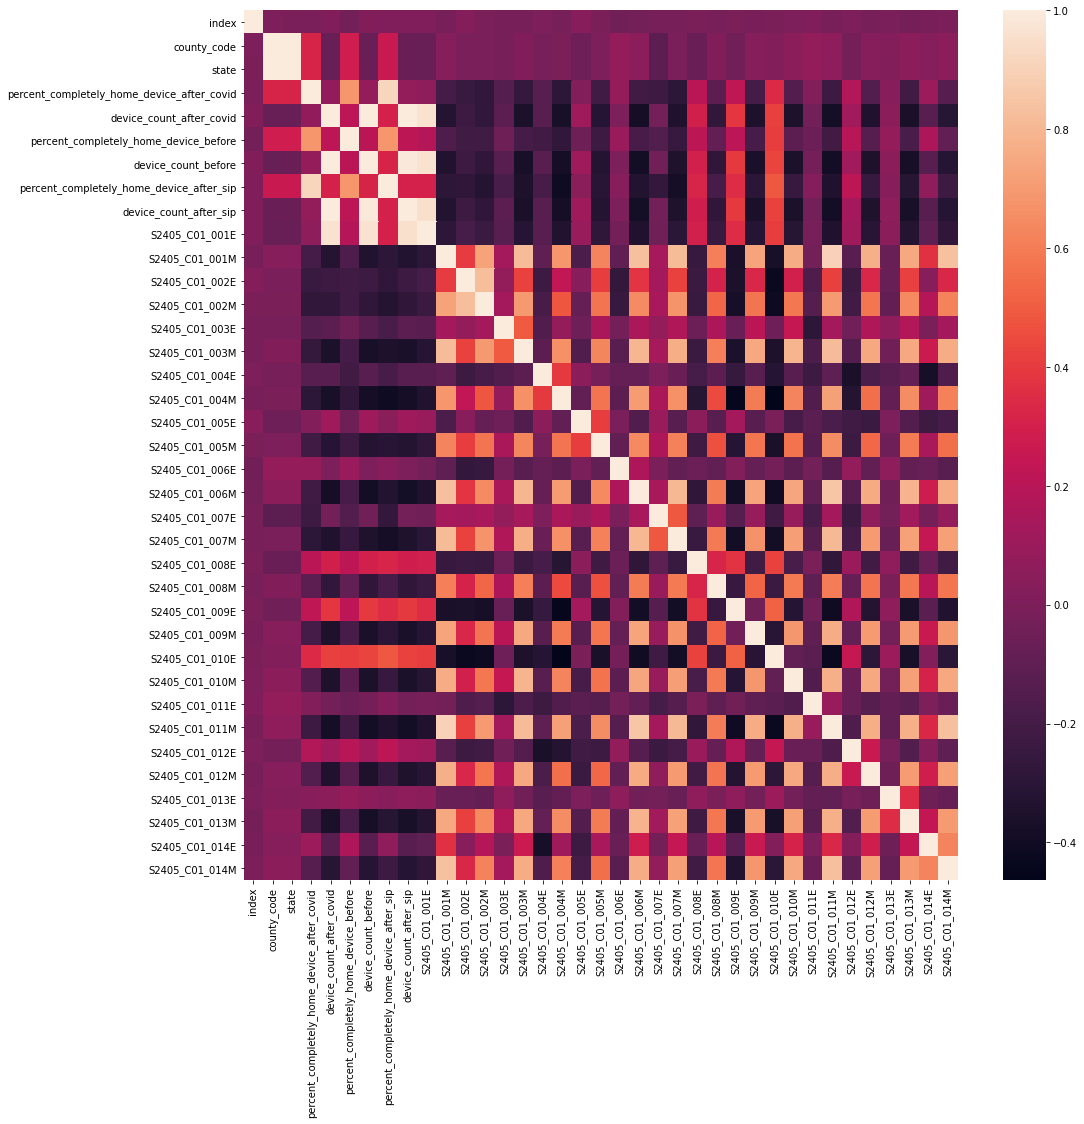

In [ ]:
plt.figure(figsize=(16,16))
sn.heatmap(corrMatrix)
plt.show()

In [ ]:
corrMatrix[np.abs(corrMatrix)<.25] = 0

In [ ]:
corrMatrix

,index,county_code,state,percent_completely_home_device_after_covid,device_count_after_covid,percent_completely_home_device_before,device_count_before,percent_completely_home_device_after_sip,device_count_after_sip,S2405_C01_001E,S2405_C01_001M,S2405_C01_002E,S2405_C01_002M,S2405_C01_003E,S2405_C01_003M,S2405_C01_004E,S2405_C01_004M,S2405_C01_005E,S2405_C01_005M,S2405_C01_006E,S2405_C01_006M,S2405_C01_007E,S2405_C01_007M,S2405_C01_008E,S2405_C01_008M,S2405_C01_009E,S2405_C01_009M,S2405_C01_010E,S2405_C01_010M,S2405_C01_011E,S2405_C01_011M,S2405_C01_012E,S2405_C01_012M,S2405_C01_013E,S2405_C01_013M,S2405_C01_014E,S2405_C01_014M
index,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
county_code,0.0,1.000000,0.999977,0.318211,0.000000,0.283108,0.000000,0.257653,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
state,0.0,0.999977,1.000000,0.319358,0.000000,0.283754,0.000000,0.258972,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
percent_completely_home_device_after_covid,0.0,0.318211,0.319358,1.000000,0.000000,0.680676,0.000000,0.915794,0.000000,0.000000,0.000000,0.000000,-0.272815,0.000000,-0.258676,0.000000,-0.290292,0.000000,0.000000,0.000000,0.000000,0.000000,-0.291436,0.000000,0.000000,0.000000,0.000000,0.338824,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
device_count_after_covid,0.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.996902,0.303758,0.994546,0.962637,-0.323225,0.000000,-0.271248,0.000000,-0.358493,0.000000,-0.371826,0.000000,-0.317056,0.000000,-0.379041,0.000000,-0.338422,0.291547,-0.272060,0.388259,-0.354060,0.420832,-0.349493,0.000000,-0.384623,0.000000,-0.341305,0.000000,-0.363908,0.000000,-0.311201
percent_completely_home_device_before,0.0,0.283108,0.283754,0.680676,0.000000,1.000000,0.000000,0.684937,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.274447,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.405922,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
device_count_before,0.0,0.000000,0.000000,0.000000,0.996902,0.000000,1.000000,0.315410,0.992376,0.961494,-0.332282,0.000000,-0.279264,0.000000,-0.368990,0.000000,-0.382063,0.000000,-0.325582,0.000000,-0.389332,0.000000,-0.348314,0.299637,-0.278909,0.399011,-0.363349,0.431306,-0.358651,0.000000,-0.394923,0.000000,-0.350080,0.000000,-0.373913,0.000000,-0.319602
percent_completely_home_device_after_sip,0.0,0.257653,0.258972,0.915794,0.303758,0.684937,0.315410,1.000000,0.307173,0.305578,-0.289360,-0.279615,-0.324254,0.000000,-0.353957,0.000000,-0.408407,0.000000,-0.304498,0.000000,-0.329946,-0.264258,-0.383431,0.323789,0.000000,0.352055,-0.292486,0.486556,0.000000,0.000000,-0.338382,0.000000,0.000000,0.000000,-0.310956,0.000000,0.000000
device_count_after_sip,0.0,0.000000,0.000000,0.000000,0.994546,0.000000,0.992376,0.307173,1.000000,0.958801,-0.329806,0.000000,-0.277276,0.000000,-0.365567,0.000000,-0.379066,0.000000,-0.323276,0.000000,-0.386473,0.000000,-0.345068,0.289440,-0.277672,0.394438,-0.360943,0.427155,-0.356194,0.000000,-0.392382,0.000000,-0.348049,0.000000,-0.371019,0.000000,-0.317604
S2405_C01_001E,0.0,0.000000,0.000000,0.000000,0.962637,0.000000,0.961494,0.305578,0.958801,1.000000,-0.286748,0.000000,0.000000,0.000000,-0.

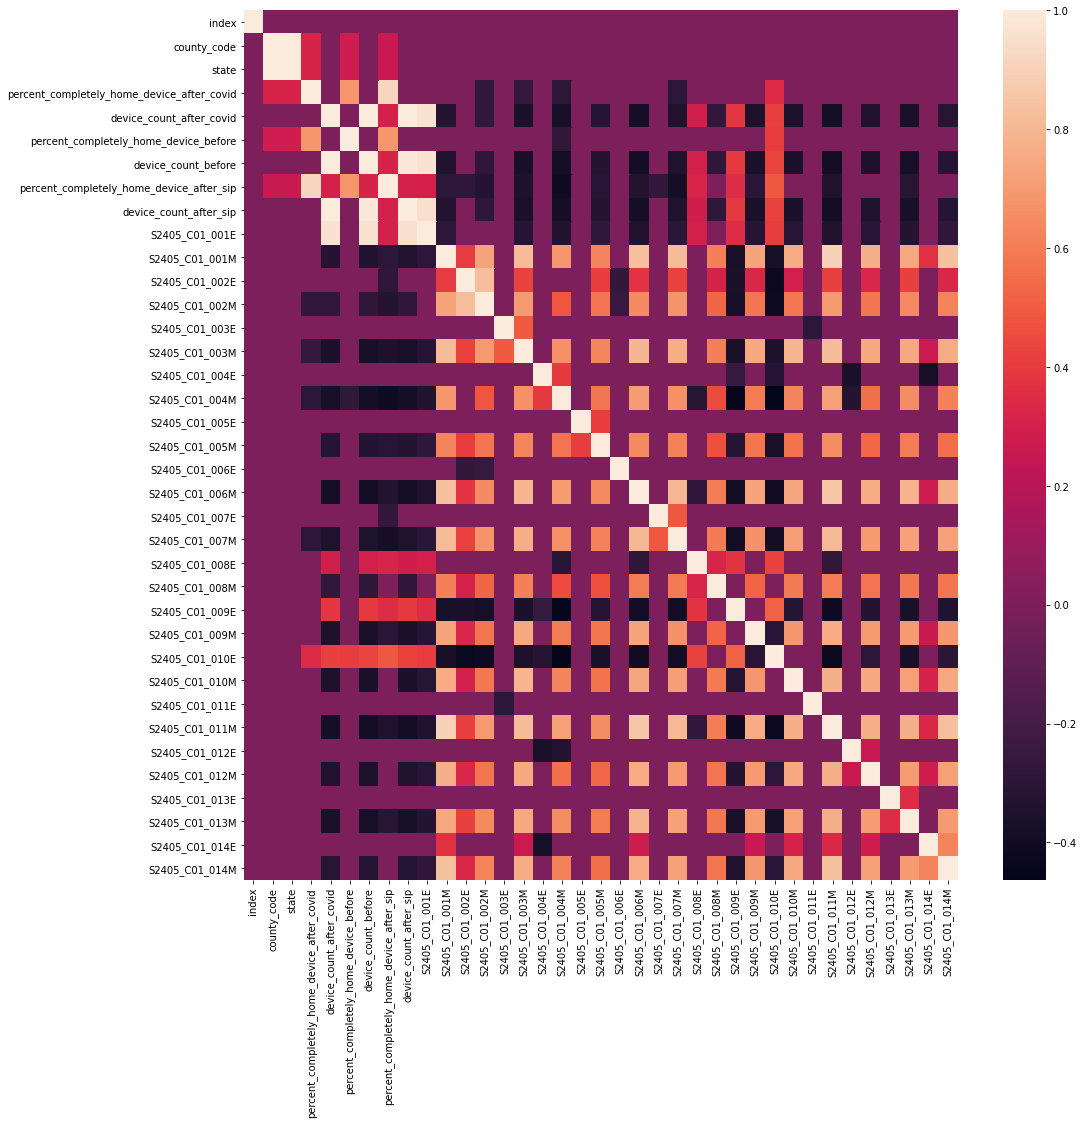

In [ ]:
plt.figure(figsize=(16,16))
sn.heatmap(corrMatrix)
plt.show()

In [ ]:
# this has strong positive correlation with % of home device after covid
schema[schema['GEO_ID'] == 'S2405_C01_010E']['id'].values[0]

'Estimate!!Total!!Civilian employed population 16 years and over!!Professional, scientific, and management, and administrative and waste management services'

In [ ]:
# this has strong positive correlation with % of home device after shelter in place
schema[schema['GEO_ID'] == 'S2405_C01_008E']['id'].values[0]

'Estimate!!Total!!Civilian employed population 16 years and over!!Information'

# 3. look at correlation between industry sector percentages and difference in percentage of staying at home devices before and after shelter in place

In [ ]:
data = pd.read_csv("merged_industry_and_dist_data.csv")

In [ ]:
data.head()

,index,cnamelong,county_code,state,state_code,percent_completely_home_device_after_covid,device_count_after_covid,percent_completely_home_device_before,device_count_before,percent_completely_home_device_after_sip,device_count_after_sip,NAME,S2405_C01_001E,S2405_C01_001M,S2405_C01_002E,S2405_C01_002M,S2405_C01_003E,S2405_C01_003M,S2405_C01_004E,S2405_C01_004M,S2405_C01_005E,S2405_C01_005M,S2405_C01_006E,S2405_C01_006M,S2405_C01_007E,S2405_C01_007M,S2405_C01_008E,S2405_C01_008M,S2405_C01_009E,S2405_C01_009M,S2405_C01_010E,S2405_C01_010M,S2405_C01_011E,S2405_C01_011M,S2405_C01_012E,S2405_C01_012M,S2405_C01_013E,S2405_C01_013M,S2405_C01_014E,S2405_C01_014M
0,0,Abbeville County,45001,45.0,SC,0.290856,1595.966667,0.251283,1643.500000,0.289275,1622.033333,"Abbeville County, South Carolina",9748,0.048625,0.016619,0.008104,0.080427,0.020312,0.238921,0.033340,0.017850,0.010361,0.083094,0.021851,0.037341,0.011695,0.018670,0.009848,0.029237,0.009746,0.086069,0.026570,0.243127,0.026775,0.064731,0.020312,0.049856,0.013541,0.034058,0.014259
1,1,Acadia Parish,22001,22.0,LA,0.277490,4169.500000,0.196973,4547.500000,0.277490,4169.500000,"Acadia Parish, Louisiana",25356,0.030762,0.122496,0.016170,0.077063,0.011713,0.098714,0.018181,0.032971,0.011319,0.140282,0.021218,0.053242,0.010648,0.016170,0.007927,0.030604,0.008164,0.058566,0.013409,0.212060,0.018221,0.066651,0.014395,0.053912,0.011989,0.037269,0.010057
2,2,Accomack County,51001,51.0,VA,0.329359,1578.500000,0.251292,1637.800000,0.337730,1608.633333,"Accomack County, Virginia",13817,0.048708,0.056814,0.017008,0.083376,0.017298,0.177101,0.028371,0.029674,0.009336,0.101252,0.019469,0.034957,0.008323,0.004777,0.003981,0.025476,0.010132,0.078888,0.019758,0.203662,0.033220,0.079105,0.020699,0.036404,0.013027,0.088514,0.018962
3,3,Ada County,16001,16.0,ID,0.385269,21199.400000,0.254269,22976.133333,0.406879,20765.800000,"Ada County, Idaho",221254,0.011471,0.014513,0.002807,0.060849,0.004655,0.087641,0.005821,0.028298,0.003525,0.117892,0.006942,0.043213,0.004362,0.021292,0.003245,0.070928,0.004628,0.129308,0.006612,0.230717,0.007982,0.091334,0.006391,0.043326,0.003864,0.060690,0.004330
4,4,Adair County,21001,21.0,KY,0.295031,723.615385,0.234935,579.314815,0.299196,656.790698,"Adair County, Kentucky",8020,0.043267,0.032045,0.011596,0.095137,0.024813,0.189401,0.030549,0.011970,0.006608,0.106858,0.025187,0.059102,0.018953,0.011970,0.006484,0.029800,0.011970,0.041895,0.013965,0.270698,0.031671,0.071696,0.024065,0.040399,0.016085,0.039027,0.014090


In [ ]:
data['diff_%home_after_covid'] = data['percent_completely_home_device_after_sip'] - data['percent_completely_home_device_before']

In [ ]:
data.corr()[-1:]

,index,county_code,state,percent_completely_home_device_after_covid,device_count_after_covid,percent_completely_home_device_before,device_count_before,percent_completely_home_device_after_sip,device_count_after_sip,S2405_C01_001E,S2405_C01_001M,S2405_C01_002E,S2405_C01_002M,S2405_C01_003E,S2405_C01_003M,S2405_C01_004E,S2405_C01_004M,S2405_C01_005E,S2405_C01_005M,S2405_C01_006E,S2405_C01_006M,S2405_C01_007E,S2405_C01_007M,S2405_C01_008E,S2405_C01_008M,S2405_C01_009E,S2405_C01_009M,S2405_C01_010E,S2405_C01_010M,S2405_C01_011E,S2405_C01_011M,S2405_C01_012E,S2405_C01_012M,S2405_C01_013E,S2405_C01_013M,S2405_C01_014E,S2405_C01_014M,diff_%home_after_covid
diff_%home_after_covid,0.030598,0.15602,0.157347,0.768684,0.262878,0.252059,0.280226,0.877722,0.262841,0.283854,-0.278622,-0.230753,-0.289319,-0.203013,-0.34179,-0.111928,-0.361944,0.096741,-0.256323,-0.020734,-0.31714,-0.249235,-0.346882,0.285753,-0.18938,0.325524,-0.266012,0.379275,-0.256865,0.077915,-0.312675,0.161648,-0.239743,-0.00481,-0.295916,-0.019488,-0.236107,1.0


In [ ]:
import seaborn as sn
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


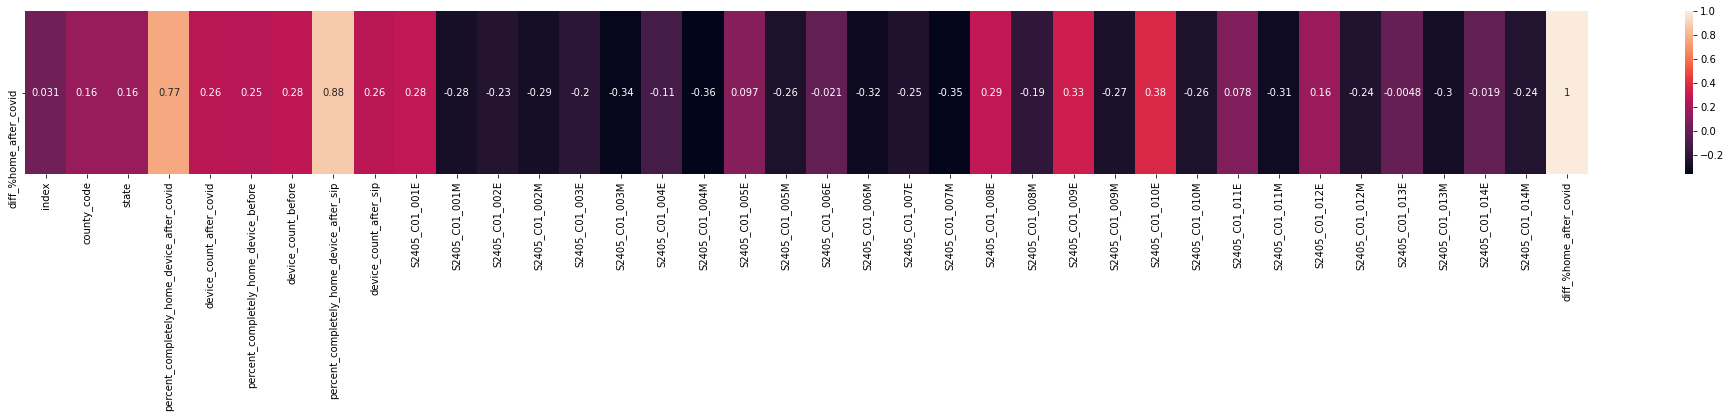

In [ ]:
plt.figure(figsize=(35,3))
sn.heatmap(data.corr()[-1:], annot=True)
plt.show()

we see that S2405_C01_010E and 9E have a high positive correlation with diff in % of stay at home devices after covid. \\
007E has a negative correlation with diff in %. \\
Don't know why but a lot of variable ending with M has high negative correlation with data as well... they shouldn't be since they are just the margin of error....

In [ ]:
# positive correlation variables:
print(schema[schema['GEO_ID'] == 'S2405_C01_010E']['id'].values[0])
print(schema[schema['GEO_ID'] == 'S2405_C01_009E']['id'].values[0])

Estimate!!Total!!Civilian employed population 16 years and over!!Professional, scientific, and management, and administrative and waste management services
Estimate!!Total!!Civilian employed population 16 years and over!!Finance and insurance, and real estate and rental and leasing


In [ ]:
# negative correlation variables:
print(schema[schema['GEO_ID'] == 'S2405_C01_007E']['id'].values[0])

Estimate!!Total!!Civilian employed population 16 years and over!!Transportation and warehousing, and utilities


Isn't this interesting? The more jobs in a county that is related to transportation the more negative the stay at home percentage change - people go out more. \\
the more jobs in a county that is about finance and insurance and scientific and management services the more positive the stay at home percentage change. \\
this is interesting!!

# Conclusion:
the job composition of a county does impact people's ability to stay at home. \\
More sceintific and management service and finance and insurance job positively correlates with increase of people's stay at home behavior \\
While more jobs like transportation/warehousing in a county negatively correlates with people's stay at home behavior.